<a href="https://colab.research.google.com/github/ShivinM-17/Tensorflow_practises/blob/main/computervision_tensorflow_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional neural networks and computer vision with tensorflow

### Get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-07-09 16:03:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 173.194.210.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   171MB/s    in 0.6s    

2023-07-09 16:03:58 (171 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

### Understanding the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Going through the directory and listing number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul  9 16:03 .
drwxr-xr-x 1 root root 4096 Jul  9 16:03 ..
drwxr-xr-x 4 root root 4096 Jul  9 16:03 test
drwxr-xr-x 4 root root 4096 Jul  9 16:03 train


In [ ]:
# Another way to find how many images are there in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

### Visualising the image data

In [ ]:
import pathlib
import numpy as np

data_dir =  pathlib.Path("pizza_steak/train")

# Creating a list of class names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names= class_names[:] # removing .DS_store
print(class_names)

['pizza' 'steak']


In [ ]:
# Visualising the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (will be viewing images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img


['2439992.jpg']
Image shape: (512, 512, 3)


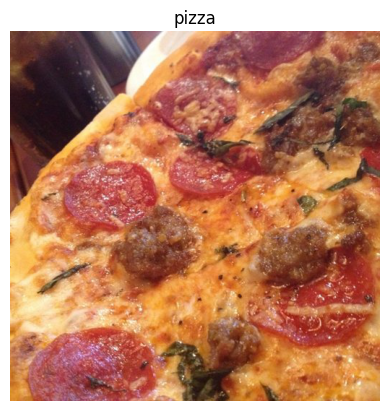

In [ ]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img.dtype
img
# the image is in the form of a matrix of integers

array([[[113,  70,  51],
        [116,  74,  52],
        [114,  72,  50],
        ...,
        [198, 122,  96],
        [184, 108,  84],
        [180, 106,  81]],

       [[113,  70,  51],
        [117,  74,  55],
        [115,  72,  53],
        ...,
        [187, 111,  85],
        [180, 106,  79],
        [195, 121,  96]],

       [[111,  68,  49],
        [116,  73,  54],
        [116,  73,  54],
        ...,
        [171,  95,  69],
        [176, 102,  75],
        [186, 112,  85]],

       ...,

       [[215, 135,  38],
        [217, 137,  42],
        [220, 139,  47],
        ...,
        [200, 135,  55],
        [199, 134,  54],
        [197, 134,  54]],

       [[216, 136,  41],
        [218, 138,  43],
        [222, 141,  49],
        ...,
        [201, 134,  53],
        [198, 133,  51],
        [197, 132,  50]],

       [[217, 137,  42],
        [219, 138,  46],
        [224, 143,  51],
        ...,
        [203, 137,  53],
        [200, 134,  50],
        [199, 133,  49]]

In [ ]:
# Converting the img to a tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[113,  70,  51],
        [116,  74,  52],
        [114,  72,  50],
        ...,
        [198, 122,  96],
        [184, 108,  84],
        [180, 106,  81]],

       [[113,  70,  51],
        [117,  74,  55],
        [115,  72,  53],
        ...,
        [187, 111,  85],
        [180, 106,  79],
        [195, 121,  96]],

       [[111,  68,  49],
        [116,  73,  54],
        [116,  73,  54],
        ...,
        [171,  95,  69],
        [176, 102,  75],
        [186, 112,  85]],

       ...,

       [[215, 135,  38],
        [217, 137,  42],
        [220, 139,  47],
        ...,
        [200, 135,  55],
        [199, 134,  54],
        [197, 134,  54]],

       [[216, 136,  41],
        [218, 138,  43],
        [222, 141,  49],
        ...,
        [201, 134,  53],
        [198, 133,  51],
        [197, 132,  50]],

       [[217, 137,  42],
        [219, 138,  46],
        [224, 143,  51],
        ...,
        [203, 137,  5

In [ ]:
# View the image shape
img.shape  # returns the width, height, color channels

(512, 512, 3)

In [ ]:
# Get all the pixel values
img/255

array([[[0.44313725, 0.2745098 , 0.2       ],
        [0.45490196, 0.29019608, 0.20392157],
        [0.44705882, 0.28235294, 0.19607843],
        ...,
        [0.77647059, 0.47843137, 0.37647059],
        [0.72156863, 0.42352941, 0.32941176],
        [0.70588235, 0.41568627, 0.31764706]],

       [[0.44313725, 0.2745098 , 0.2       ],
        [0.45882353, 0.29019608, 0.21568627],
        [0.45098039, 0.28235294, 0.20784314],
        ...,
        [0.73333333, 0.43529412, 0.33333333],
        [0.70588235, 0.41568627, 0.30980392],
        [0.76470588, 0.4745098 , 0.37647059]],

       [[0.43529412, 0.26666667, 0.19215686],
        [0.45490196, 0.28627451, 0.21176471],
        [0.45490196, 0.28627451, 0.21176471],
        ...,
        [0.67058824, 0.37254902, 0.27058824],
        [0.69019608, 0.4       , 0.29411765],
        [0.72941176, 0.43921569, 0.33333333]],

       ...,

       [[0.84313725, 0.52941176, 0.14901961],
        [0.85098039, 0.5372549 , 0.16470588],
        [0.8627451 , 0

### Building a CNN to find patterns in the images
* Load the images
* Preprocess the images
* Build a CNN to find patterns in our patterns
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Pre-process the data (getting all data between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to the data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/train"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
# Build a CNN model (similar to TINY VGG)
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_1 = model1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 30s 372ms/step - loss: 0.5532 - accuracy: 0.6973 - val_loss: 0.4232 - val_accuracy: 0.8133
Epoch 2/5
47/47 [==============================] - 16s 341ms/step - loss: 0.4128 - accuracy: 0.8147 - val_loss: 0.3891 - val_accuracy: 0.8327
Epoch 3/5
47/47 [==============================] - 17s 356ms/step - loss: 0.4164 - accuracy: 0.8140 - val_loss: 0.3863 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 17s 358ms/step - loss: 0.3776 - accuracy: 0.8393 - val_loss: 0.3242 - val_accuracy: 0.8707
Epoch 5/5
47/47 [==============================] - 16s 333ms/step - loss: 0.3318 - accuracy: 0.8680 - val_loss: 0.2872 - val_accuracy: 0.8820


**Note-** Remember to connect GPU, since it takes a long time without it

In [ ]:
# Give a model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Making another model (MODEL-2)

In [ ]:
train_data

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history2 = model2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 402ms/step - loss: 1.3591 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 17s 373ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 16s 346ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 15s 330ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 16s 341ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Even though we have more 10x parameters than before, the model still doesn't perform that much better



### Creating another model (yet again) MODEL-3

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile model
model3.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fitting the model
history3 = model3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data = valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 340ms/step - loss: 3.0336 - accuracy: 0.6273 - val_loss: 0.5463 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 15s 326ms/step - loss: 0.6448 - accuracy: 0.7227 - val_loss: 0.6926 - val_accuracy: 0.6633
Epoch 3/5
47/47 [==============================] - 15s 325ms/step - loss: 0.6576 - accuracy: 0.7220 - val_loss: 0.5364 - val_accuracy: 0.7887
Epoch 4/5
47/47 [==============================] - 15s 320ms/step - loss: 0.7117 - accuracy: 0.7240 - val_loss: 1.1885 - val_accuracy: 0.6287
Epoch 5/5
47/47 [==============================] - 18s 394ms/step - loss: 0.7316 - accuracy: 0.7153 - val_loss: 0.8194 - val_accuracy: 0.7600


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Now, this model has 500x the number of parameters as the previous ones, but still it doesn't work as good as CNN

In [ ]:
# Summary of CNN model (model-1)
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification

1) Become one with the data (visualize, visualize, visualize...)                 
2)Preprocess the data (prepare it for a model)                                 
3) Create a model (start with a baseline)  
4) Fit the model                          
5) Evaluate the model                     
6) Adjust different parameters and improve model

#### Knowing more about the data

['3425047.jpg']
Image shape: (512, 512, 3)
['52934.jpg']
Image shape: (512, 384, 3)


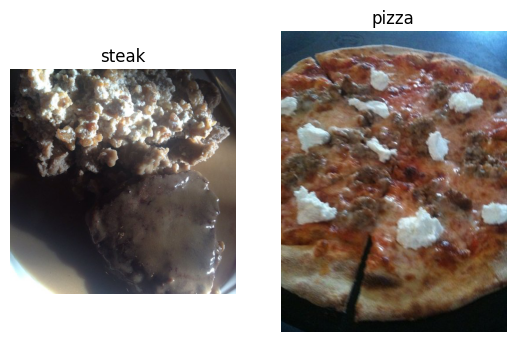

In [ ]:
# Visualise the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")

plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/","pizza")

#### Preprocessing the data for the model

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Now, turning the data into batches (small subset of data). Here, the model only takes a batch of data (here, 32) at a time, rather than 10,000 or more images at a time.

It does this, since the GPU may not be able to fit in that many images into its memory

If we make the model large number of images at a time, it may not be able to learn very well

In [ ]:
!nvidia-smi

Sun Jul  9 16:09:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    29W /  70W |   2955MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Creating train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load on our image data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target directory of images
                                               target_size=(224,224),  # Target size of images (height, width)
                                               class_mode="binary",   # type of data you're working with
                                               batch_size=32)   # size of mini-batches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch
images, labels = train_data.next()   # get the next batch
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches present?
len(train_data)

47

In [ ]:
32*47

1504

In [ ]:
# get the first two images
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [ ]:
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

#### Create a CNN model (baseline model)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model
model6 = Sequential([
    Conv2D(filters = 10,
           kernel_size=3,
           strides=1,  # step that the sliding window takes on the input image
           padding="valid",
           # If padding - same, then output shape is same as input shape
           # if valid - then less than input shape
           activation="relu",
           input_shape=(224, 224, 3)),  # input shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # since binary classification model
])


In [ ]:
# Compiling the model
model6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [ ]:
# Checking size of our data
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history4 = model6.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 257ms/step - loss: 0.6885 - accuracy: 0.6913 - val_loss: 0.3996 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 12s 258ms/step - loss: 0.3716 - accuracy: 0.8447 - val_loss: 0.3212 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.2226 - accuracy: 0.9213 - val_loss: 0.3619 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 13s 274ms/step - loss: 0.0739 - accuracy: 0.9767 - val_loss: 0.4176 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.0305 - accuracy: 0.9933 - val_loss: 0.5417 - val_accuracy: 0.8120


In [ ]:
model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#### Evaluating the model

<Axes: >

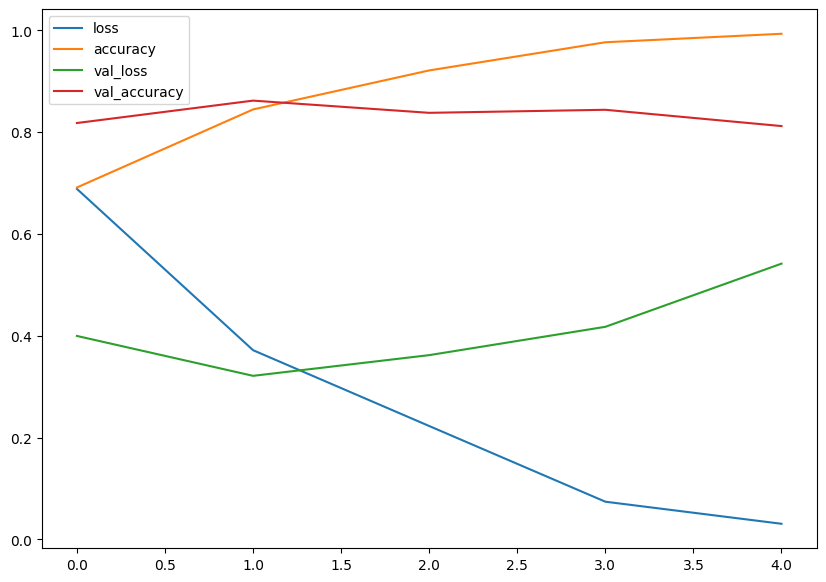

In [ ]:
# Plotting the training curves
import pandas as pd

pd.DataFrame(history4.history).plot(figsize=(10,7))

In [ ]:
# Plotting validation and training curves seperately

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))  # no. of epochs we ran the model for

  # Plot the loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



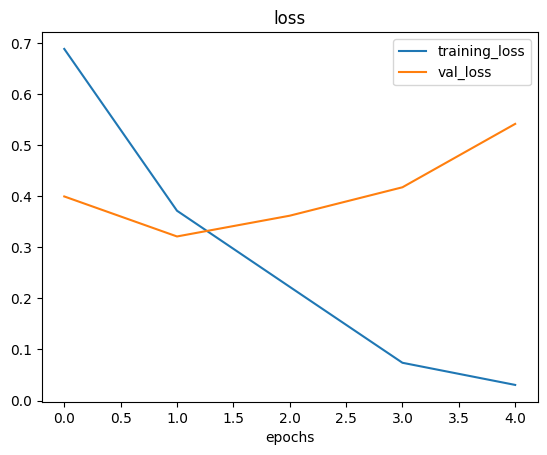

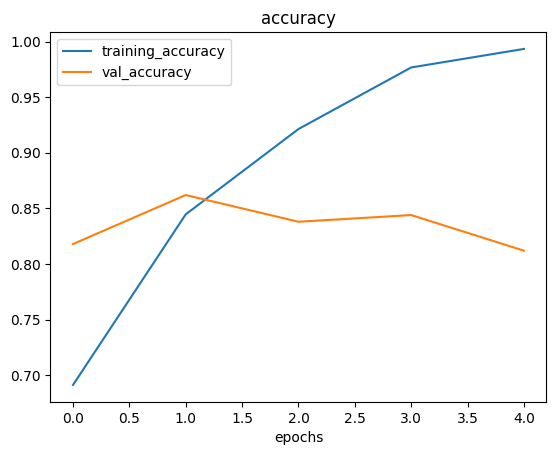

In [ ]:
# Checking out the loss and accuracy plots of the model
plot_loss_curves(history4)

**Note:-** When a model's **Validation loss** starts to **increase**, it means that the model is likely to be **overfitting** the training dataset. This means, it''s learning the patterns in the training dataset *too well* and thus the model's ability to predict out generalised data gets diminished

**Note:-** Normally, the training and validation curves must be similar to each other. If there are large differnces, this means that there is some overfitting happening

#### Adjusting the model parameters
We'll try to reduce overfitting by using MaxPool2D layers in our model or by adding data augmentation

#### Adding MaxPool2D to the model

In [ ]:
# Create a model
model7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model
model7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [ ]:
# Fitting the model
history5 = model7.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 237ms/step - loss: 0.6099 - accuracy: 0.6787 - val_loss: 0.4477 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 11s 222ms/step - loss: 0.4436 - accuracy: 0.7907 - val_loss: 0.3828 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4133 - accuracy: 0.8247 - val_loss: 0.3490 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3775 - accuracy: 0.8373 - val_loss: 0.3694 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3725 - accuracy: 0.8347 - val_loss: 0.3136 - val_accuracy: 0.8880


In [ ]:
# Getting a summary of the model
model7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

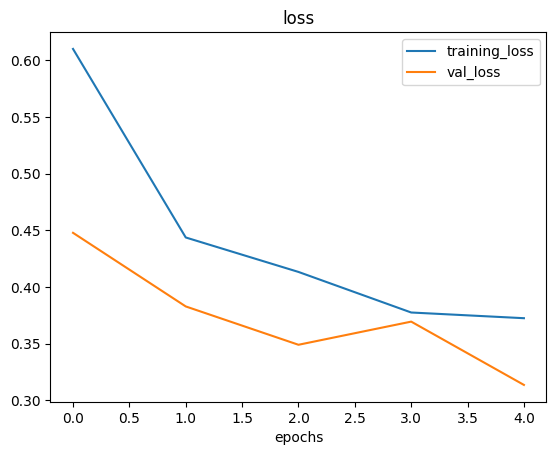

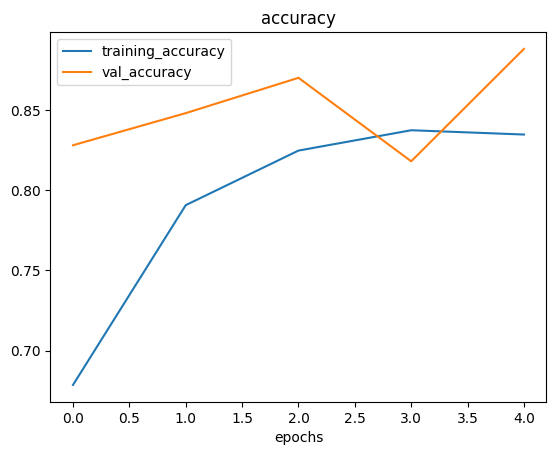

In [ ]:
# Plotting the loss curves of the model
plot_loss_curves(history5)

#### Adding data augmentation to the model

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data Augmentataion:-** It is the process of altering our training data, leading to have more diversity and in turn allowing our models to learn more generalizable patterns. Alterning may mean adjusting the rotation of an image, flipping it, cropping it or other techniques that may change the original image

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

# Create a non-augmented train data batch
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create a non-augmented test data batch
print("Non-augmented testing data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary"
                                               )

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented testing data:
Found 500 images belonging to 2 classes.


**Note:-** Data Augmentation is usually performed on the training data

#### Visualising the augmented data

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 26


(-0.5, 223.5, 223.5, -0.5)

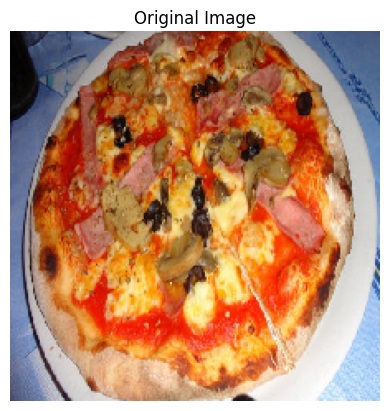

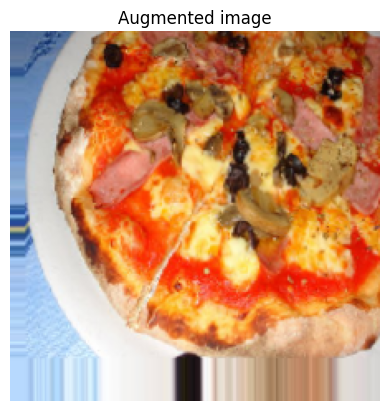

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0,31)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

#### Creating a model on the augmented data

In [ ]:
# Create a model
model8 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10, 3 , activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compiling the model
model8.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fit the model
history5 = model8.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 548ms/step - loss: 0.7169 - accuracy: 0.4780 - val_loss: 0.6842 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6868 - accuracy: 0.5627 - val_loss: 0.6521 - val_accuracy: 0.6700
Epoch 3/5
47/47 [==============================] - 26s 549ms/step - loss: 0.7042 - accuracy: 0.5560 - val_loss: 0.6660 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6928 - accuracy: 0.5380 - val_loss: 0.6673 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 26s 557ms/step - loss: 0.6661 - accuracy: 0.5967 - val_loss: 0.5764 - val_accuracy: 0.8020


In [ ]:
# Getting the summary of the model
model8.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, None, None, 10)  

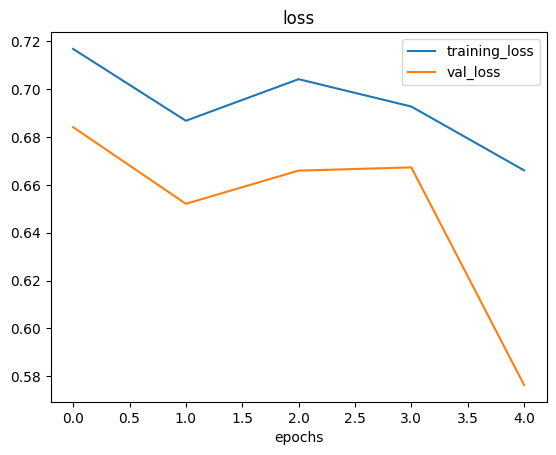

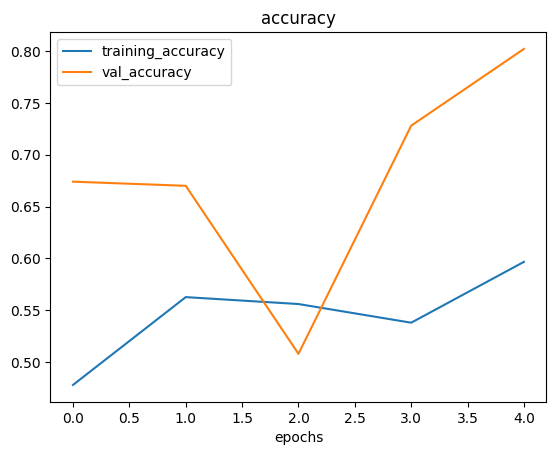

In [ ]:
# Plotting the loss curves
plot_loss_curves(history5)

This model was made based on un-shuffled data, now making a model which will fit on shuffled data

#### Shuffling the data

In [ ]:
# Importing data and augment it and shuffling the data from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)



Found 1500 images belonging to 2 classes.


#### Creating the model for shuffled data

In [ ]:
# Create the model
model9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model9.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

# Fitting the model
history6 = model9.fit(train_data_augmented_shuffled,
                      epochs=7,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data = test_data,
                      validation_steps=len(test_data)
                      )


Epoch 1/7
47/47 [==============================] - 28s 546ms/step - loss: 0.6690 - accuracy: 0.6007 - val_loss: 0.7134 - val_accuracy: 0.5760
Epoch 2/7
47/47 [==============================] - 26s 555ms/step - loss: 0.5726 - accuracy: 0.7120 - val_loss: 0.3934 - val_accuracy: 0.8240
Epoch 3/7
47/47 [==============================] - 26s 561ms/step - loss: 0.5096 - accuracy: 0.7567 - val_loss: 0.3702 - val_accuracy: 0.8420
Epoch 4/7
47/47 [==============================] - 26s 545ms/step - loss: 0.5001 - accuracy: 0.7673 - val_loss: 0.3555 - val_accuracy: 0.8440
Epoch 5/7
47/47 [==============================] - 27s 569ms/step - loss: 0.4898 - accuracy: 0.7753 - val_loss: 0.3186 - val_accuracy: 0.8720
Epoch 6/7
47/47 [==============================] - 26s 558ms/step - loss: 0.4623 - accuracy: 0.7847 - val_loss: 0.3429 - val_accuracy: 0.8440
Epoch 7/7
47/47 [==============================] - 29s 615ms/step - loss: 0.4389 - accuracy: 0.8053 - val_loss: 0.2997 - val_accuracy: 0.8820


In [ ]:
# Get the summary of the model
model9.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

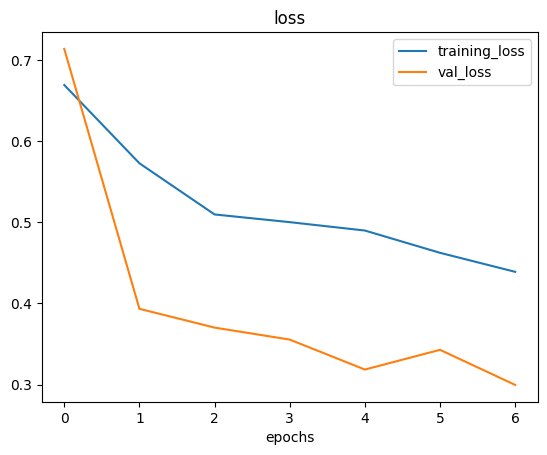

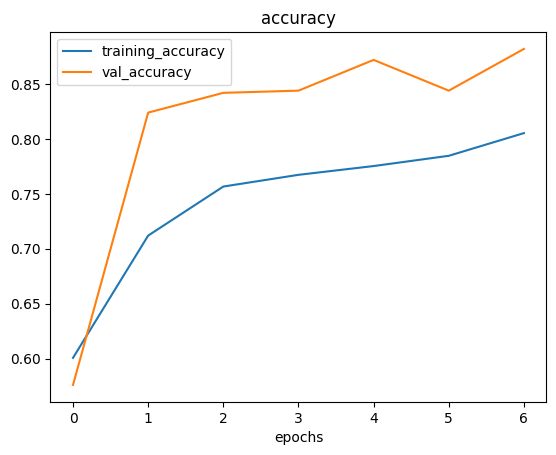

In [ ]:
# Getting the loss curves
plot_loss_curves(history6)

### Making a prediction with our trained model on the custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2023-07-09 16:17:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-07-09 16:17:34 (32.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

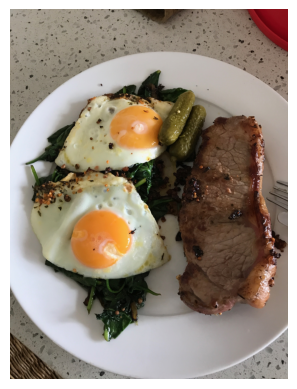

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Checking the shape
steak.shape

(4032, 3024, 3)

**Note:** When you train a model and want predictions using custom data, it's import for the custom data to be preprocessed into the same format as the data the model was trained on.

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 127, 100],
         [149, 127, 103],
         [114,  

In [ ]:
# Create a function to import an image and resize it to be able to use in the model
def load_and_prep_image(filename, img_shape=224):
  # Reads an image from filename, turns it into a tensor and reshapes it
  # to (img_shape, img_shape, color_channels)

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resizing the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Re-scale the image (get all values between0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess the custom image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Now, predicting using the model
pred = model9.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 190ms/step


array([[0.7745436]], dtype=float32)

Here, we have got the prediction probabilities of the classes.
Here, since the probability > 0.5, therefore it assumes that the first class given is the output

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Getting the output class from the predicted probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the prediction class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 20ms/step


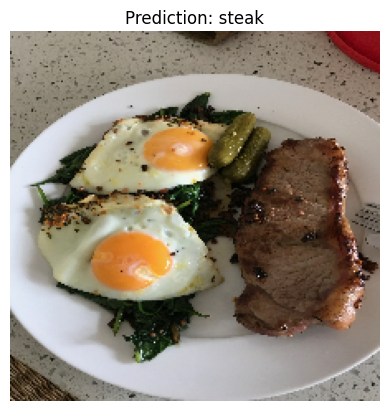

In [ ]:
# Test our model on a custom image
pred_and_plot(model9,"03-steak.jpeg")

Trying the model on other custom image

--2023-07-09 16:19:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-07-09 16:19:25 (39.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 96ms/step


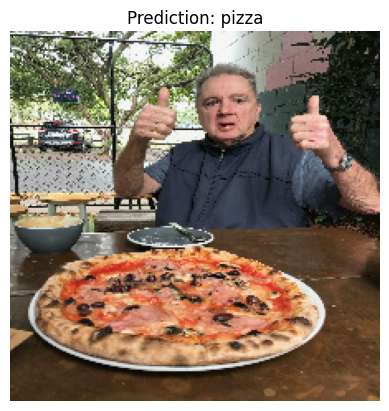

In [ ]:
# Downloading another test custom image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model9, "03-pizza-dad.jpeg")

## Multi-class image classification
1) Become one with the data               
2) Preprocess the data (getting it ready for the model)                           
3) Create a model                         
4) Fit the model                          
5) Evaluate the model                     
6) Adjust different hyperparameters and improve the model                         
7) Repeat util satisfied

### Importing the data and knowing more about it

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-07-09 16:19:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  51.6MB/s    in 6.1s    

2023-07-09 16:19:39 (81.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 1

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Getting the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualising the data we have got
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (will be viewing images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['3168485.jpg']
Image shape: (288, 512, 3)


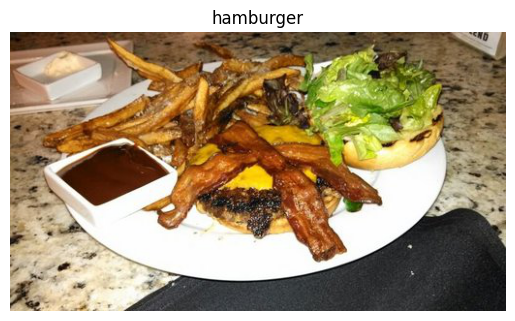

In [ ]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [ ]:
random.choice(class_names)

'ramen'

### Preprocessing the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Creating a CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Activation

# Create a model
model10 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model10.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history7 = model10.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps = len(test_data)
                       )

Epoch 1/5
235/235 [==============================] - 59s 242ms/step - loss: 2.1353 - accuracy: 0.2256 - val_loss: 2.0110 - val_accuracy: 0.2628
Epoch 2/5
235/235 [==============================] - 53s 225ms/step - loss: 1.9291 - accuracy: 0.3239 - val_loss: 1.8658 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 53s 224ms/step - loss: 1.5749 - accuracy: 0.4687 - val_loss: 1.8385 - val_accuracy: 0.3596
Epoch 4/5
235/235 [==============================] - 54s 230ms/step - loss: 1.0005 - accuracy: 0.6723 - val_loss: 2.0711 - val_accuracy: 0.3636
Epoch 5/5
235/235 [==============================] - 53s 224ms/step - loss: 0.4242 - accuracy: 0.8721 - val_loss: 2.9773 - val_accuracy: 0.3356


### Evaluating the model

In [ ]:
# Evaluate on the test data
model10.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 2.9773 - accuracy: 0.3356


[2.9773108959198, 0.33559998869895935]

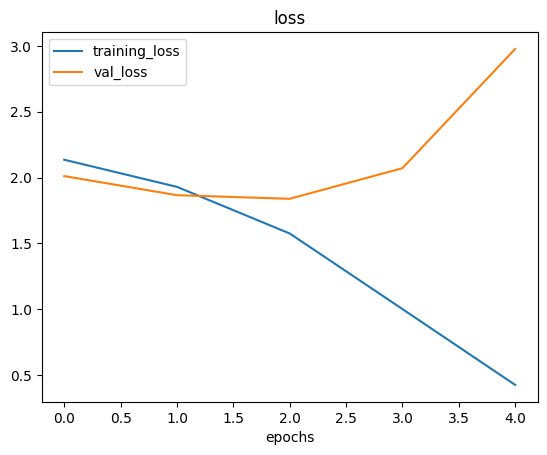

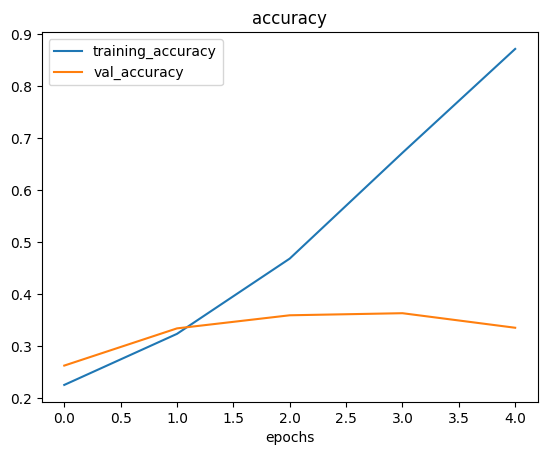

In [ ]:
# Checking out the loss curves
plot_loss_curves(history7)

From the loss curves, we can see that the training loss is decreasing and val loss is increasing, thus this being a overfitting condition (and a bad case too). Also, the accuracy curves are also too far apart for it to be a good predictive model.

### Adjusting the model (Trying to remove overfitting)
We can remove the overfitting condition of the model by -                      
* Getting more data
* Simplify the model (by reducing numbner of layers or hidden units in the layers)
* Using data augmentation to the data to add more diversity to it
* Use transfer learning

In [ ]:
model10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [ ]:
# Trying to remove 2 Conv2D layers
model11 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compiling the data
model11.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the data
history8 = model11.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))


Epoch 1/5
235/235 [==============================] - 52s 215ms/step - loss: 2.1573 - accuracy: 0.2155 - val_loss: 1.9599 - val_accuracy: 0.3108
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 1.8188 - accuracy: 0.3799 - val_loss: 1.9223 - val_accuracy: 0.3336
Epoch 3/5
235/235 [==============================] - 52s 222ms/step - loss: 1.4010 - accuracy: 0.5423 - val_loss: 1.9864 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 67s 286ms/step - loss: 0.8620 - accuracy: 0.7339 - val_loss: 2.3175 - val_accuracy: 0.3044
Epoch 5/5
235/235 [==============================] - 51s 218ms/step - loss: 0.4370 - accuracy: 0.8777 - val_loss: 2.9638 - val_accuracy: 0.2844


In [94]:
model11.evaluate(test_data)

79/79 [==============================] - 23s 290ms/step - loss: 2.9638 - accuracy: 0.2844


[2.9638450145721436, 0.28439998626708984]

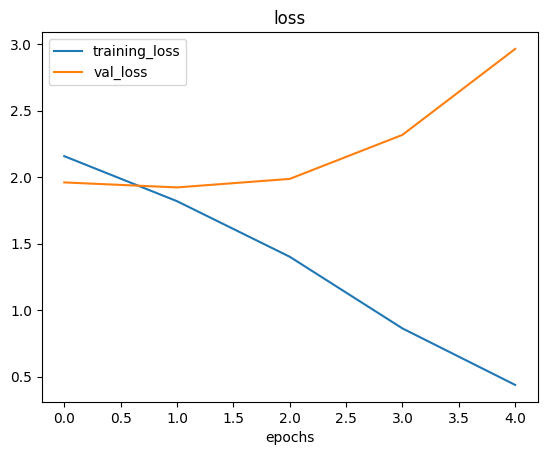

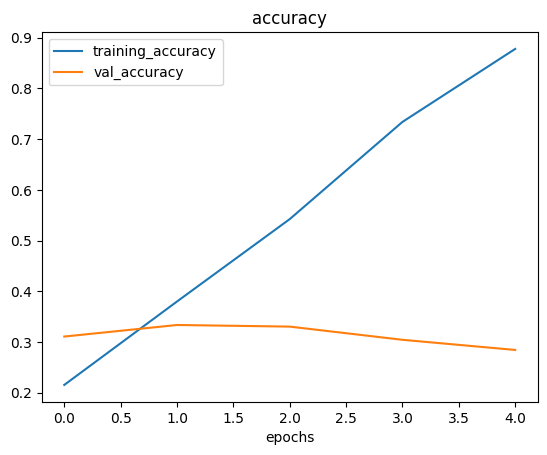

In [95]:
plot_loss_curves(history8)

It seems like the almost same loss and accuracy occured as before

In [96]:
model11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

This may be because, even though we reduced the number of layers in the model, the number of parameters are still large in number

### Adding data augmentation to the data
Reducing overfitting in the model by using data augmentation

In [99]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [100]:
# Creating another model but here fitting the augmented data

# Clone the model11 to model12
model12 = tf.keras.models.clone_model(model10)

# Compile the cloned model
model12.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [101]:
# Fit the model
history9 = model12.fit(train_data_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 549ms/step - loss: 2.2916 - accuracy: 0.1247 - val_loss: 2.2041 - val_accuracy: 0.1824
Epoch 2/5
235/235 [==============================] - 124s 528ms/step - loss: 2.1976 - accuracy: 0.1829 - val_loss: 2.1251 - val_accuracy: 0.2272
Epoch 3/5
235/235 [==============================] - 121s 513ms/step - loss: 2.1031 - accuracy: 0.2469 - val_loss: 1.9544 - val_accuracy: 0.3116
Epoch 4/5
235/235 [==============================] - 121s 515ms/step - loss: 2.0227 - accuracy: 0.2841 - val_loss: 1.8404 - val_accuracy: 0.3536
Epoch 5/5
235/235 [==============================] - 121s 517ms/step - loss: 1.9954 - accuracy: 0.3051 - val_loss: 1.8815 - val_accuracy: 0.3372


In [102]:
model12.evaluate(test_data)

79/79 [==============================] - 23s 296ms/step - loss: 1.8815 - accuracy: 0.3372


[1.8815205097198486, 0.33719998598098755]

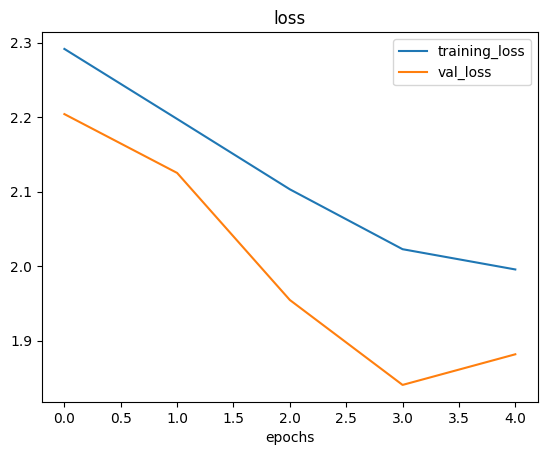

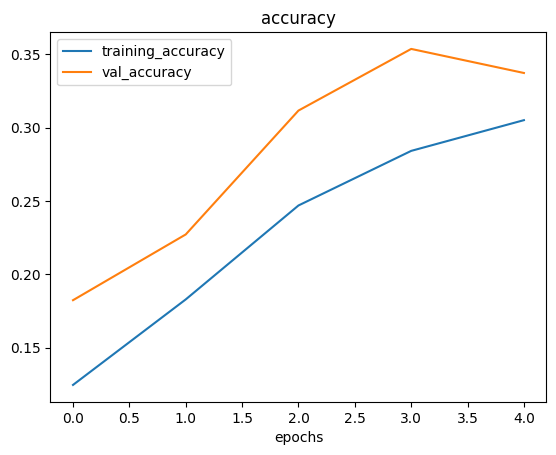

In [103]:
plot_loss_curves(history9)

Now, the loss curves are much better

### Repeat until satisfied
This can be done by performing different experiments -
* Restructuring the model's architecture
* Adjust the learning rate
* Try different methods of data augmentation
* Training for longer
* Trying transfer learning


### Making prediction with the trained model

In [104]:
# Getting the classes
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [105]:
# Downloading the custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-07-09 17:33:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.08s   

2023-07-09 17:33:19 (44.0 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-07-09 17:33:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [107]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [108]:
def pred_and_plot(model, filename, class_names=class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add a logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 21ms/step


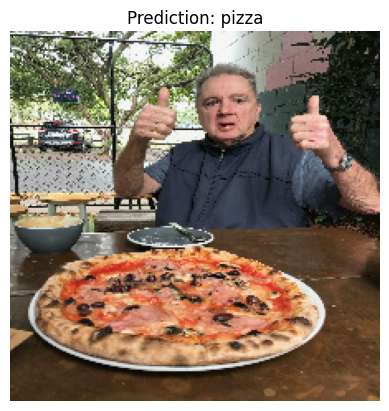

In [115]:
# Now, making predictions
pred_and_plot(model=model11,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step


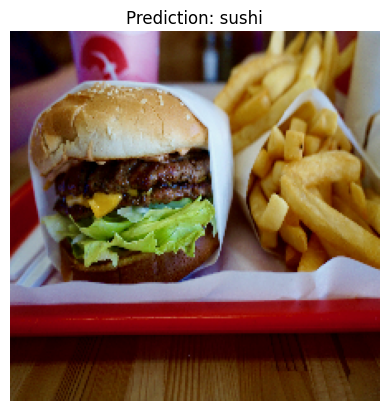

In [114]:
# Now, making predictions
pred_and_plot(model=model11,
              filename="03-hamburger.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 59ms/step


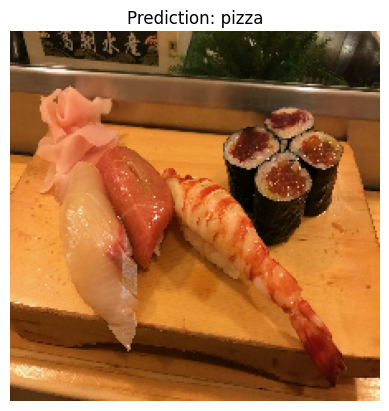

In [113]:
# Now, making predictions
pred_and_plot(model=model11,
              filename="03-sushi.jpeg",
              class_names=class_names)

Since, the model we trained only had about 30-40 % accuracy, therefore we see that most of the predictions are not good.
Thus, there is a requirement to make the model to be more accurate

### Saving and loading the model

In [116]:
# Saving the model
model12.save("Save_trained_model")

In [117]:
loaded_model12 = tf.keras.models.load_model("Save_trained_model")
loaded_model12.evaluate(test_data)

79/79 [==============================] - 18s 221ms/step - loss: 1.8815 - accuracy: 0.3372


[1.8815208673477173, 0.33719998598098755]

In [118]:
model12.evaluate(test_data)

79/79 [==============================] - 25s 318ms/step - loss: 1.8815 - accuracy: 0.3372


[1.8815205097198486, 0.33719998598098755]